In [1]:
                        ### First cell is a 243 line piece of code: ###
                                ## Important libraries ##
                                ## Important constants ##
                                ## Important functions ##

# Important libraries #
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
import os
import scipy.integrate as integrate
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import pandas as pd
import csv
import math
import warnings
from matplotlib import colors
warnings.filterwarnings('ignore')
import random
from astrotools.skymap import PlotSkyPatch



# Important constants in SI units #

k=1.380649e-23   # m^2 kg s^-2 K^-1 or J/K        # Boltzmann
G=6.6743e-11    # m^3 kg^-1 s^-2                 # Newton
e=1.602176634e-19 # A s                          # Electric charge
h=6.62607015e-34  # m^2 kg s^-1 or J.s           # Planck
c=299792458        # m/s                                                            # Light
sigma= 5.670374419e-8  #W/m^2/K^4               # Stefan-Boltzmann
me=510998.950       #eV/c**2                    # Electron mass
thomson= 6.65245e-25  # cm^2                    # Sigma thomson
avg_cmb_photon=6.34e-4 # eV                     # Avg CMB photon energy


# Important functions #

# Transform a matrix into a txt file with the name you pick
                                 ### COME BACK TO IT LATER

def data_into_txt(matrix):
    theshit=np.matrix(matrix)
    name=input ('Enter file name: ')
    with open(f'{name}.txt','wb') as f:
        for line in theshit:
            np.savetxt(f, line, fmt='%.2f')
###

# Extract 2D plot (x,y) data from CSV file #

def data_extractor(directory):
    file=open(directory)
    csvreader=csv.reader(file)
    rows=[]
    for row in csvreader:
        rows.append(row)
    x=[]
    y=[]
    for i in range (len(rows)):
        x.append (rows[i][0])
        y.append (rows[i][1])
    for i in range (len(x)):
        x[i]=float(x[i])
        y[i]=float(y[i])
    return (x,y)

# Unit exchange:
# Way=1 ---> kelvin to cm-1
# Way=2 ---> cm-1 to kelvin

def hz_to_ev(hz,way):
    if way==1:
        return (hz*4.1357e-15)
    elif way==2:
        return (hz/4.1357e-15)
    
def kelvin_to_cm(kelvin, way): # cm^-1
    if way==1:
        return (kelvin*1e4/(11606*1.23981))
    elif way==2:
        return (kelvin/1e4*11606*1.23981)
    
def kelvin_to_ev(kelvin,way):
    if way==1:
        return(kelvin/11606)
    elif way==2:
        return (kelvin*11606)
    
def ev_to_cm(ev,way):  # cm^-1
    if way==1:
        return (ev*1e4/1.23981)
    elif way==2:
        return (ev/1e4*1.23981)

#cm-1 to kpc-1  
def cm_to_kpc(cm,way):
    if way==1:
        return (cm/3.24e-22)
    elif way==2:
        return (cm*3.24e-22)
    
###

# KE in eV
def KE(T):
    return (k*T/e ,'eV')

#photon energy in eV
def photon_E(mu,T):
    E=h*mu
    return (E/e)

# Midpoint integration
def midpoint_rule(a,b,n,f):
    h=(b-a)/n
    X1=[]
    X2=[]
    for i in range(0,n):
        x1=a+(i*h)
        X1.append(x1)
    for j in range (1,n+1):
        x2=a+(j*h)
        X2.append(x2)
    X_value1 = np.array(X1)
    X_value2 = np.array(X2)
    X_midpoint=(X_value1+X_value2)/2
    I=h*(sum(f(X_midpoint)))
    return I

#trapezoidal online

def trape(x0,xn,n):
    # calculating step size
    h = (xn - x0) / n
    
    # Finding sum 
    integration = N(x0) + N(xn)
    
    for i in range(1,n):
        k = x0 + i*h
        integration = integration + 2 * N(k)
    
    # Finding final integration value
    integration = integration * h/2
    
    return integration

# RK4
T=kelvin_to_cm(2.7255,1)
def f(x,y):
    return 8*np.pi*T**3*x**2/(np.exp(x/T)-1)

def rk4(x0,y0,xn,n):
    h=(xn-x0)/n
    for i in range (n):
        k1 = h * (f(x0, y0))
        k2 = h * (f((x0+h/2), (y0+k1/2)))
        k3 = h * (f((x0+h/2), (y0+k2/2)))
        k4 = h * (f((x0+h), (y0+k3)))
        k = (k1+2*k2+2*k3+k4)/6
        yn = y0 + k
        y0 = yn
        x0 = x0+h
    return (f(xn,yn))

# Avg spectrum energy
def avg_E(E,N):
    avg=0
    for i in range (len(E)):
        avg=avg+ N[i]*E[i]
    avg=avg/(sum(N))
    return (avg)

# Boltzmann distribution probability

def prob(wvlg,T):
    z=0
    for i in (lambdas):
         z=z+ np.exp(-h*c/i/k/T)
    prob=np.exp(-h*c/wvlg/k/T)/z
    return (prob)

# Rayleigh Jeans spectrum

def ray_jeans(T):
    Bs=[]
    for i in (mus):
        B= 8*np.pi*i**2*k*T/c**3
        Bs.append (B)
    plt.plot (mus, Bs)
    plt.title ('Rayleigh-Jeans Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Spectral Radiance')
    plt.xlim([0,1e15])
    plt.ylim([0,3e-15])
    
# Wavelength domain

def black_body(T,lambdas):
    Bs=[]
    for i in (lambdas):
        B= 8*np.pi*h*c/(i**4)*(1/(np.exp(h*c/i/k/T)-1))/1e6/e
        Bs.append (B)
        
    lambdas=lambdas*1e6
    return (lambdas, Bs)
    
# frequency domain
def black_body_freq(T,mus):
    N=[]
    E=[]
    for i in (mus):
        
        E.append(photon_E(i,T))
        
        x=h*i/k/T
        x=np.float128(x)
    
        y=8*(np.pi)*i**3/c**3/1e6
        y=np.float128(y)
        
        B= y/(np.exp(x)-1)
        N.append (B)
    return (N,E)
    
#energy domain

def bb_energy(T):
    
    #Define the energy range you  want or uncomment this one (corresponds to CMB range)
    #energies=np.logspace (-9,-2,1000)
    N=[]
    for i in (energies):
        
        x=i*e/k/T
        x=np.float128(x)
        
        y=8* np.pi* (i*e)**3 /(h*c)**3 /1e6
        y=np.float128(y)
        
        B= y/(np.exp(x)-1)
        N.append (B)
    return (N)

#energy domain_for_statistics

def bb_energy_stat(T):
    
    #Define the energy range you  want or uncomment this one (corresponds to CMB range)
    #energies=np.logspace (-9,-2,1000)
    N=[]
    for i in (energies):
        
        x=i*e/k/T
        x=np.float128(x)
        
        y=8* np.pi* (i*e)**3 /(h*c)**3 /1e6/i
        y=np.float128(y)
        
        B= y/(np.exp(x)-1)
        N.append (B)
    return (N)

In [2]:
# Calculate Number density for CMB
mus=np.logspace (8,13,1000)
CMB_N=black_body_freq(2.7255,mus)[0]
CMB_E=black_body_freq(2.7255,mus)[1]

In [3]:
# CMB Number density
# Extracting points from Lipari and LEE to compare 
# By using a function written above 'data_extractor'

# Vernetto Lipari
numb_density='/home/chris/Desktop/APC_internship/extractor/numb_density_datapoints_verlipary.csv'
x_n=data_extractor(numb_density)[0]
y_n=data_extractor(numb_density)[1]

# Lee
nb_density_Lee='/home/chris/Desktop/APC_internship/extractor/Lee_NbDensity.csv'
x2_n=data_extractor (nb_density_Lee)[0]
y2_n=data_extractor(nb_density_Lee)[1]

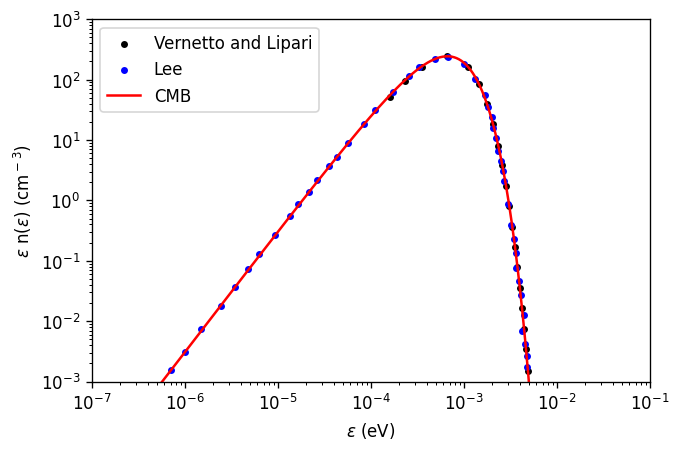

In [4]:
plt.figure (dpi=120)
# Scatter Lipari and Lee Data
plt.scatter (x_n,y_n,color='black',s=(10), label='Vernetto and Lipari')
plt.scatter (x2_n,y2_n, color='blue', label='Lee', s=(10))

# Plot CMB number density 
plt.plot (CMB_E,CMB_N,color='red', label='CMB')

plt.xscale ('log')
plt.yscale ('log')

plt.xlim([1e-7, 1e-1])
plt.ylim([1e-3,1e3])

plt.xlabel ('$\epsilon$ (eV)')
plt.ylabel('$\epsilon$ n($\epsilon$) (cm$^-$$^3$)')

plt.legend()

In [5]:
# Calculate CMB E density
lambdas=np.linspace(1e-5,1,10000)
CMB_Ed=black_body(2.7255,lambdas)[1]
CMB_wvlg=black_body(2.7255,lambdas)[0]

In [6]:
# CMB En density
# Extracting points from Lipari and Vernetto to compare
# By using a function written above 'data_extractor'

en_density='/home/chris/Desktop/APC_internship/extractor/Edensity_datapoints_VernLiparri.csv'
x_en_density=data_extractor(en_density)[0]
y_en_density=data_extractor(en_density)[1]

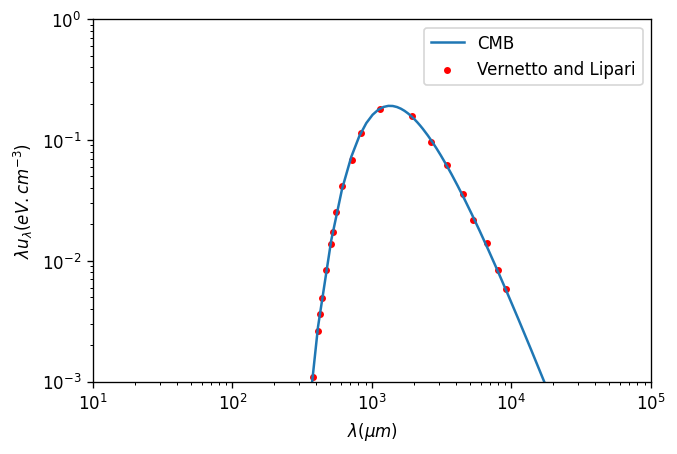

In [7]:
# Plotting energy density for CMB and dust
plt.figure (dpi=120)

# Our data
plt.plot (CMB_wvlg,CMB_Ed, label='CMB')
# Scale
plt.xscale ('log')
plt.yscale ('log')

#Limits
plt.ylim ([1e-3,1])
plt.xlim([10,1e5])

#Labels
plt.xlabel ('$\lambda(\mu m)$')
plt.ylabel ('$\lambda u_{\lambda}(eV.cm^{-3})$')

#Extracted data
plt.scatter(x_en_density,y_en_density,color='red',label='Vernetto and Lipari',s=10)
plt.legend()

In [8]:
 # CMB density using scipY.QUAD  #1

T= kelvin_to_cm(2.7255,1) # Change kelvin to cm^-1x
quad=integrate.quad (lambda x: 8*np.pi*T**3 *x**2/(np.exp(x)-1),0,10000)[0]

In [9]:
quad

410.6013167670191

In [10]:
# Number density using Numpy TRAPEZOID #2

energies=np.logspace (-9,-2,1000)
mnm=bb_energy(2.7255)
numpy_trapz= np.trapz(mnm,energies)

In [11]:
#  Cumulative Trapezoid #3

cumtrapz= integrate.cumtrapz(mnm,energies)[-1]

In [12]:
# CMB DENSITY USING ONLINE TRAPEZOID #4

T= kelvin_to_cm(2.7255,1)
def N(x):
    return (8*np.pi*T**3*x**2/(np.exp(x)-1))

online_trapz= trape(1e-11,1e2,10000)

In [13]:
online_trapz

410.5998935087756

In [14]:
# photon density using zeta function  #5

def density(T):
    zeta3=1.202056901178332
    d=2*zeta3*8*np.pi*(k*T/c/h)**3
    return (d/1e6)

zeta= density(2.7255)

In [15]:
zeta

410.7268472478743

In [16]:
# Comparison between different integrators

###
# Pyton Trapezoid
# Online Version Trapezoid
# Cumulative Python Trapezoid
# Python integrated quad method
# Python simpson
###

integration_points=np.arange (2,100000,1000)

trapz=[]
on_trapz=[]
cumtrap=[]
py_quads=[]
simps=[]

for i in integration_points:
    i=int (i)
    
    #Normal trapz
    energies=np.logspace (-11,2,i)
    mnm=bb_energy_stat(2.7255)
    diff=abs(zeta-np.trapz(mnm,energies))/zeta
    trapz.append (diff)
    
    # Cumulative trapezoid 
    heh=integrate.cumtrapz(mnm,energies)
    cumtrap.append (abs(heh[-1]-zeta)/zeta)
    
    #Online trapz
    diff=abs(zeta-trape(1e-11,1e2,i))/zeta
    on_trapz.append (diff)
    
    #Quad
    py_quad=integrate.quad (lambda x: 8*np.pi*T**3 *x**2/(np.exp(x)-1),0,i)[0]
    diff=abs(zeta-py_quad)/zeta
    py_quads.append(diff)
    
    #Simpson
    simp=integrate.simpson(mnm,energies)
    diff=abs(simp-zeta)/zeta
    simps.append (diff)

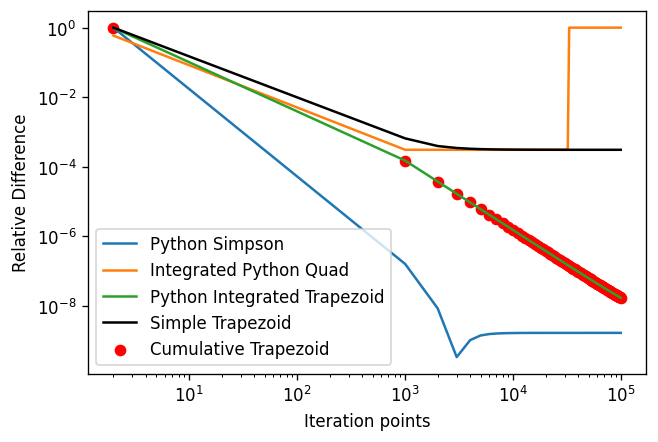

In [17]:
# 

plt.figure (dpi=120)

plt.plot (integration_points, simps, label= 'Python Simpson')
plt.plot (integration_points, py_quads, label='Integrated Python Quad')
plt.plot (integration_points,trapz, label='Python Integrated Trapezoid')
plt.plot (integration_points, on_trapz, label='Simple Trapezoid', color='black')
plt.scatter (integration_points, cumtrap, label ='Cumulative Trapezoid', color='red')

plt.xscale ('log')
plt.yscale ('log')

plt.xlabel ('Iteration points')
plt.ylabel ('Relative Difference')

plt.legend()


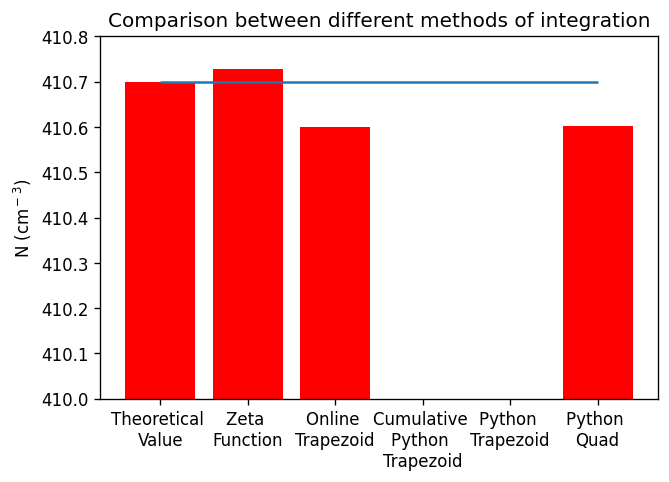

In [18]:
plt.figure (dpi=120)

values = [410.7,zeta, online_trapz, cumtrapz, numpy_trapz,quad]
####
percentages=[]
for i in values:
    percentages.append (abs(i-410.7)/410.7)
######
labels = ['Theoretical \nValue','Zeta \nFunction', 'Online \nTrapezoid', 'Cumulative \nPython \nTrapezoid', 'Python \nTrapezoid','Python \nQuad']

plt.subplot()
plt.bar(labels, values, color='red')
plt.ylim([410,410.8])
plt.ylabel('N (cm$^-$$^3$)')
plt.title ('Comparison between different methods of integration')
plt.hlines(410.7,xmin='Theoretical \nValue', xmax='Python \nQuad')
plt.show()

In [19]:
# Extracting points from Lipari and Vernetto to compare 
# By using a function written above 'data_extractor'

cs_datapoints='/home/chris/Desktop/APC_internship/extractor/CS_datapoints_vernetto_lipari.csv'
x_cs=data_extractor(cs_datapoints)[0]
y_cs=data_extractor(cs_datapoints)[1]

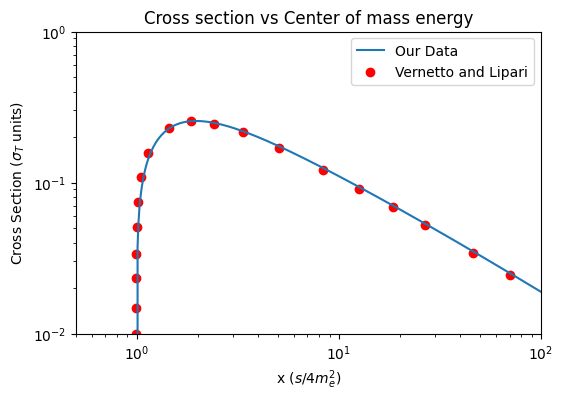

In [20]:
# x=s/4m^2   (s = center of mass energy squared)
# beta = sqrt (1-1/x)
# Cross section vs x

x=np.linspace (1,1e3,100000)
betas=[]
sigmas=[]
for i in (x):
    betas.append ((1-1/i)**0.5)
for i in (betas):
    sigma=3/16 * (1-i**2)*(2*i*(i**2-2)+(3-i**4)*np.log((1+i)/(1-i)))
    sigmas.append (sigma)

    
plt.figure (dpi=100)
plt.plot (x,sigmas,label='Our Data')
plt.xscale ('log')
plt.yscale ('log')
plt.xlim([0.5,1e2])
plt.ylim([1e-2,1])
plt.xlabel('x ($s/4m_e^2$)')
plt.ylabel ('Cross Section ($\sigma$$_T$ units)')
plt.title ('Cross section vs Center of mass energy')
plt.scatter(x_cs,y_cs,color='red',label='Vernetto and Lipari')
plt.legend()

In [21]:
# Function to calculate INTEGRATION OVER CROSS SECTION 
# In terms of x

avg_eps=ev_to_cm(6.34e-4,1)
T=kelvin_to_cm(2.7255,1)
m_electron=ev_to_cm(me,1)

# Define epsilon range in log space

eps=np.logspace(-11,2,1000)

# Defining it in cm
eps_cm=[]
for i in range (len(eps)):
    eps_cm.append(ev_to_cm(eps[i],1))

# Cross section amplitude found analytically

cross_section_amplitude= 3/8*thomson

# Integrate cross section

def int_cs(E):
    x0=[]
    cross_s=[] 
    eps_limit= me**2/E
    
    for i in (eps):
        x0.append (E*i/me**2)
        
    
    for j in range (len(x0)):
        # Condition on epsilon, aka x0
        if x0[j]<=1:
            cross_s.append(0)
            
        elif x0[j]>1:
            # Create a logspace space array to calculate the f(x)
            logx0=np.log10(x0[j])
            x=np.logspace (0,logx0,1000)
            f=[]
            for i in x:
                f.append (cross_section_amplitude*i/(x0[j])**2 *(2*np.sqrt(1-1/i)*(-1-1/i)+(3-(1-1/i)**2)*np.log((1+np.sqrt(1-1/i))/(1-np.sqrt(1-1/i)))))
            
            # Create a logspace array to integrate over
            y=[]
            for i in x:
                y.append (np.log(i))
                
            # Add the integration to an array
            cross_s.append (integrate.simpson(f,y))
    
    return (cross_s, x0, eps_limit)

In [22]:
# CMB ABSORPTION

# Define Energy Range
Es=np.logspace (13,19,50)
CMB_E=np.logspace (-11,2,1000)
energies=CMB_E
CMB_N=bb_energy(2.7255)

K=[]
# Calculate Absorption for every energy
for i in (Es):
    integral= int_cs(i)
    cs=integral[0]
    limit=integral[2]
    
    # Introduce condition on epsilon (Integrate starting from epsilon>limit)
    reduced_CMB_N=[]
    reduced_CMB_E=[]
    
    for kk in range (len(CMB_E)):
        if CMB_E[kk]>limit:
            reduced_CMB_E.append (CMB_E[kk])
            reduced_CMB_N.append (CMB_N[kk])
    
    if len(reduced_CMB_E)==0:
        K.append (0)
        continue
    # Create interpolation function for the 1st integral
    g=interp1d(np.log(eps),cs, kind='quadratic')   
    
    absorption_CMB=[]
    for j in range (len(reduced_CMB_E)):
        en=np.log(reduced_CMB_E[j])
        absorption_CMB.append (cm_to_kpc(reduced_CMB_N[j]*float(g(en)),1))
    K.append (integrate.simpson(absorption_CMB,np.log(reduced_CMB_E)))

In [23]:
# Absorption comparison with Vernetto and Lipari
# Using function defined above (data_extractor)

abso='/home/chris/Desktop/APC_internship/extractor/K_datapoints_vernetLipar.csv'
x_K=data_extractor(abso)[0]
y_K=data_extractor(abso)[1]

abso2='/home/chris/Desktop/APC_internship/extractor/Lee_abso.csv'
x2_K=data_extractor(abso2)[0]
y2_K=data_extractor(abso2)[1]

# change Lee data from Mpc-1 to Kpc-1
for i in range (len(x2_K)):
    y2_K[i]=y2_K[i]*1e-3

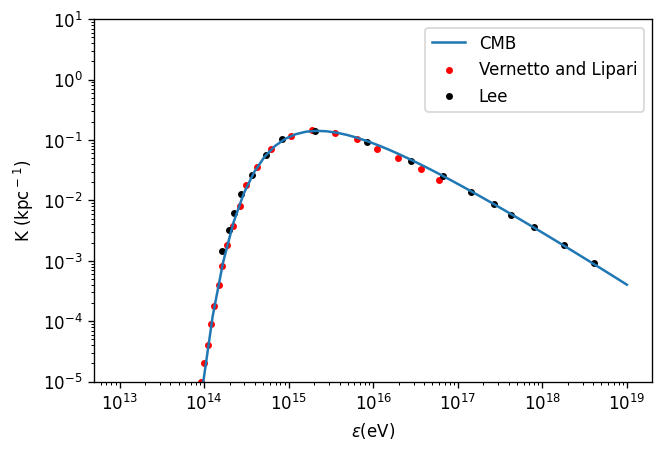

In [24]:
plt.figure (dpi=120)
    
plt.plot (Es,K,label='CMB')

plt.xscale ('log')
plt.yscale ('log')

plt.xlabel ('$\epsilon$(eV)')
plt.ylabel ('K (kpc$^-$$^1$)')

plt.ylim([1e-5,10])

plt.scatter (x_K,y_K, color='red',label='Vernetto and Lipari',s=10)
plt.scatter (x2_K,y2_K, color='black', label='Lee', s=10)

plt.legend()